<a href="https://colab.research.google.com/github/MuhammadBilal848/Deep-Learning-Practice/blob/main/A.N.N%20Implementation%20On%20Customer%20Chrun%20Using%20Reglarization%20(80%25%20Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [151]:
df.drop('customerID',axis = 1,inplace = True)

In [152]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [153]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [154]:
df.select_dtypes(object).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [155]:
df.select_dtypes(np.number).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [156]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [157]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [158]:
df.MonthlyCharges = df.MonthlyCharges.astype(np.int8)

In [159]:
df.TotalCharges.dropna(inplace = True)

In [160]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df.TotalCharges = df.TotalCharges.astype(np.int8)

In [161]:
# df.Churn = df.Churn.replace({'Yes':1 , 'No':0})

In [162]:
df.StreamingMovies.replace('No internet service','No',inplace = True)
df.MultipleLines.replace('No phone service','No',inplace = True)
df.OnlineSecurity.replace('No internet service','No',inplace = True)
df.StreamingTV.replace('No internet service','No',inplace = True)
df.TechSupport.replace('No internet service','No',inplace = True)
df.OnlineBackup.replace('No internet service','No',inplace = True)
df.DeviceProtection.replace('No internet service','No',inplace = True)

In [163]:
df.StreamingMovies.value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

In [164]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [165]:
df.gender.replace({'Male':1 , 'Female':0},inplace=True)
df.Partner.replace({'Yes':1 , 'No':0},inplace=True)
df.Dependents.replace({'Yes':1 , 'No':0},inplace=True)
df.PhoneService.replace({'Yes':1 , 'No':0},inplace=True)
df.MultipleLines.replace({'Yes':1 , 'No':0},inplace=True)
df.OnlineSecurity.replace({'Yes':1 , 'No':0},inplace=True)
df.OnlineBackup.replace({'Yes':1 , 'No':0},inplace=True)
df.DeviceProtection.replace({'Yes':1 , 'No':0},inplace=True)
df.TechSupport.replace({'Yes':1 , 'No':0},inplace=True)
df.StreamingTV.replace({'Yes':1 , 'No':0},inplace=True)
df.StreamingMovies.replace({'Yes':1 , 'No':0},inplace=True)
df.Churn.replace({'Yes':1 , 'No':0},inplace=True)
df.PaperlessBilling.replace({'Yes':1 , 'No':0},inplace=True)

In [166]:
len(df.columns)

20

In [167]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [168]:
list(df.select_dtypes(object).columns)

['InternetService', 'Contract', 'PaymentMethod']

In [169]:
df = pd.get_dummies(data=df,columns = list(df.select_dtypes(object).columns))

In [170]:
mms = MinMaxScaler()
df[['tenure','MonthlyCharges','TotalCharges']] = mms.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [171]:
x = df.drop('Churn',axis = 1)
y = df['Churn']

In [172]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.2,random_state = 20)

In [173]:
model = keras.Sequential([
      keras.layers.Dense(26 , 'relu',input_shape = (26,)), # input layer
      keras.layers.Dense(30,'relu'),
      keras.layers.Dropout(0.4),
      keras.layers.Dense(40,'relu'),
      keras.layers.Dropout(0.4),
      keras.layers.Dense(50,'relu'),
      keras.layers.Dropout(0.4),
      keras.layers.Dense(60,'relu'),
      keras.layers.Dropout(0.4),
      keras.layers.Dense(70,'relu'),
      keras.layers.Dropout(0.4),
      keras.layers.Dense(1,'sigmoid')
])

model.compile(
    optimizer = 'Adam',
    metrics = 'Accuracy',
    loss = 'binary_crossentropy')

model.fit(xtrain,ytrain,epochs = 200)
     

Epoch 1/200
177/177 [==============================] - 3s 5ms/step - loss: 0.5527 - Accuracy: 0.7158
Epoch 2/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4832 - Accuracy: 0.7291
Epoch 3/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4757 - Accuracy: 0.7444
Epoch 4/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4626 - Accuracy: 0.7733
Epoch 5/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4587 - Accuracy: 0.7732
Epoch 6/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4513 - Accuracy: 0.7813
Epoch 7/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4443 - Accuracy: 0.7872
Epoch 8/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4453 - Accuracy: 0.7843
Epoch 9/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4396 - Accuracy: 0.7925
Epoch 10/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4439 - Accura

In [174]:
model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.5639 - Accuracy: 0.7991


[0.5638605952262878, 0.7991483211517334]

In [175]:
ypred = model.predict(xtest)

45/45 [==============================] - 0s 2ms/step


In [176]:
np.round(model.predict(xtest)[:10].reshape(-1))

45/45 [==============================] - 0s 2ms/step


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [177]:
ytest[:10]

3309    0
321     0
3289    0
4187    0
1675    1
6048    1
1185    1
6343    0
5553    1
6066    1
Name: Churn, dtype: int64

In [178]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(ytest,np.round(ypred))

<Axes: >

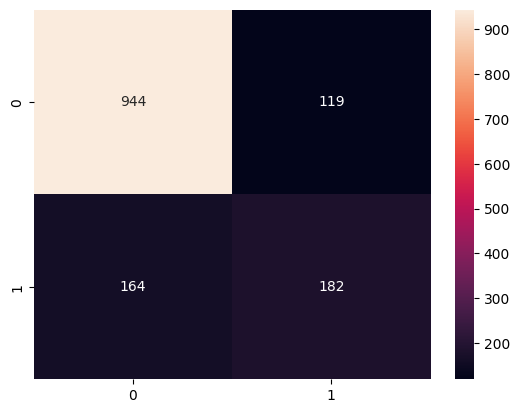

In [179]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt= 'd')

In [180]:
print(classification_report(ytest,np.round(ypred)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1063
           1       0.60      0.53      0.56       346

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

